
# Import libraries

In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

import xarray as xr
print('xarray: %s' % xr.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)


# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version


# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN


from collections import Counter
from numpy import * 



# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)

pandas: 1.3.5
xarray: 0.20.1
geopandas: 1.21.5
tensorflow: 2.0.0
Tensorflow/Keras: 2.2.4-tf
pandas: 1.3.5


Using TensorFlow backend.


sklearn: 1.0.2
plotly: 5.6.0
/Users/3rfanian/P_main


# DATA importing

In [2]:
test_set = pd.read_csv('data_with_newtarget/test_set_with_newtarget.csv')
validation_set = pd.read_csv('data_with_newtarget/validation_set_with_newtarget.csv')
traning_set = pd.read_csv('data_with_newtarget/traning_set_with_newtarget.csv')

#training with yestersay lsm
traning_df = traning_set['newlsm']
traning_df
ndf = traning_df.iloc[1:]
ndf.loc[4268771,] = 0.0
nd = ndf.reset_index()
del nd["index"]
nd =nd.rename(columns={'newlsm': 'Tomorrow_lsm'})
df2 = traning_set.assign(Tomorrow_lsm=nd)
del df2["Unnamed: 0"]

#validation with yestersay lsm
validation_df = validation_set['newlsm']
ndf_val = validation_df.iloc[1:]
ndf_val.loc[688402,] = 0.0
nd_val = ndf_val.reset_index()
del nd_val["index"]
nd_val =nd_val.rename(columns={'newlsm': 'Tomorrow_lsm'})
df3 = validation_set.assign(Tomorrow_lsm=nd_val)
del df3["Unnamed: 0"]


#test with yestersay lsm
test_df = test_set['newlsm']
ndf_test = test_df.iloc[1:]
ndf_test.loc[539487,] = 0.0
nd_test = ndf_test.reset_index()
del nd_test["index"]
nd_test =nd_test.rename(columns={'newlsm': 'Tomorrow_lsm'})
df4 = test_set.assign(Tomorrow_lsm=nd_test)
del df4["Unnamed: 0"]


training_set_wt = df2
validation_set_wt =df3
test_set_wt = df4


##### Step 2 - Split training data
x_training = training_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******training features******")
#print (x_training)
y_training = training_set_wt[['Tomorrow_lsm']]
print ("******training target******")
#print (y_training)

##### Step 3 - Split test data
x_test = test_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******test features******")
#print (x_test)
y_test = test_set_wt[['Tomorrow_lsm']]
print ("******test target******")
#print (y_test)

##### Step 4 - Split validation data
x_validation = validation_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******validation features******")
#print (x_validation)
y_validation = validation_set_wt[['Tomorrow_lsm']]
print ("******validation target******")
#print (y_validation)

******training features******
******training target******
******test features******
******test target******
******validation features******
******validation target******


# SMOTEEEN


In [3]:

print('Before SMOTEENN')

dff = y_training
M = y_training.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

smtenn = SMOTEENN()

X_training_smtenn, Y_traning_smtenn = smtenn.fit_resample(x_training, y_training)

print('After SMOTEENN')
dff = Y_traning_smtenn
M = Y_traning_smtenn.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

Before SMOTEENN
[0. 1.]
> Class=0 : 4254174/4268771 (99.7%)
> Class=1 : 14597/4268771 (0.3%)
After SMOTEENN
[0. 1.]
> Class=0 : 4133888/8388051 (49.3%)
> Class=1 : 4254163/8388051 (50.7%)


In [7]:
##### Step 5 - Specify the structure of a Neural Network
model_simple_SMOTEENN = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_simple_SMOTEENN.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_simple_SMOTEENN.fit(X_training_smtenn, Y_traning_smtenn, epochs = 1 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8388053 samples, validate on 688402 samples
8388053/8388053 [==============================] - 2278s 272us/sample - loss: 0.3962 - accuracy: 0.8105 - val_loss: 0.3529 - val_accuracy: 0.8406


In [9]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTEENN_512n = (model_simple_SMOTEENN.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple_SMOTEENN_512n = (model_simple_SMOTEENN.predict(x_test))
#> 0.01).astype(int)


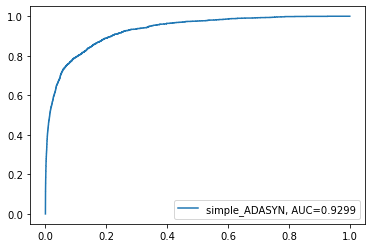

In [10]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTEENN_512n)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTEENN_512n), 4)
plt.plot(fpr,tpr,label="simple_ADASYN, AUC="+str(auc))





#add legend
plt.legend()

In [11]:
model_simple_SMOTEENN.save('model_simple_SMOTEENN_512n')
model_simple_SMOTEENN.save('model_simple_SMOTEENN_512n.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_simple_SMOTEENN_512n/assets


2022-06-26 22:29:23.059417: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [14]:
##### Step 5 - Specify the structure of a Neural Network
model_complex_SMOTEENN_4l_512n = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_complex_SMOTEENN_4l_512n.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_complex_SMOTEENN_4l_512n.fit(X_training_smtenn, Y_traning_smtenn, epochs = 2 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8388053 samples, validate on 688402 samples
Epoch 1/2
8388053/8388053 [==============================] - 5387s 642us/sample - loss: 0.4053 - accuracy: 0.8045 - val_loss: 0.4320 - val_accuracy: 0.8164
Epoch 2/2
8388053/8388053 [==============================] - 5078s 605us/sample - loss: 0.3962 - accuracy: 0.8106 - val_loss: 0.4251 - val_accuracy: 0.8367


In [15]:
model_complex_SMOTEENN_4l_512n.save('model_complex_SMOTEENN_4l_512n')
model_complex_SMOTEENN_4l_512n.save('model_complex_SMOTEENN_4l_512n.h5')

INFO:tensorflow:Assets written to: model_complex_SMOTEENN_4l_512n/assets


In [16]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complex_SMOTEENN_4l_512n = (model_complex_SMOTEENN_4l_512n.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complex_SMOTEENN_4l_512n = (model_complex_SMOTEENN_4l_512n.predict(x_test))
#> 0.01).astype(int)


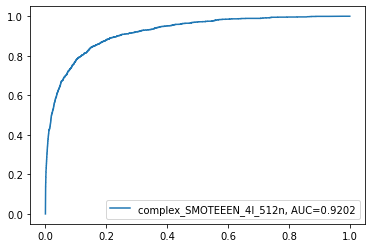

In [17]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complex_SMOTEENN_4l_512n)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complex_SMOTEENN_4l_512n), 4)
plt.plot(fpr,tpr,label="complex_SMOTEEEN_4l_512n, AUC="+str(auc))





#add legend
plt.legend()

In [4]:
##### Step 5 - Specify the structure of a Neural Network
model_complex_SMOTEENN_4l_512n = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_complex_SMOTEENN_4l_512n.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_complex_SMOTEENN_4l_512n.fit(X_training_smtenn, Y_traning_smtenn, epochs = 25 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


2022-06-30 10:59:50.590840: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-30 10:59:50.593260: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 8388052 samples, validate on 688402 samples
Epoch 1/25
8388052/8388052 [==============================] - 4752s 567us/sample - loss: 0.4051 - accuracy: 0.8042 - val_loss: 0.3847 - val_accuracy: 0.8830
Epoch 2/25
8388052/8388052 [==============================] - 5277s 629us/sample - loss: 0.3966 - accuracy: 0.8102 - val_loss: 0.5069 - val_accuracy: 0.7511
Epoch 3/25
8388052/8388052 [==============================] - 6809s 812us/sample - loss: 0.3958 - accuracy: 0.8105 - val_loss: 0.3311 - val_accuracy: 0.8753
Epoch 4/25
8388052/8388052 [==============================] - 5065s 604us/sample - loss: 0.3953 - accuracy: 0.8110 - val_loss: 0.4649 - val_accuracy: 0.7286
Epoch 5/25
8388052/8388052 [==============================] - 4738s 565us/sample - loss: 0.3949 - accuracy: 0.8115 - val_loss: 0.6186 - val_accuracy: 0.6673
Epoch 6/25
8388052/8388052 [==============================] - 5233s 624us/sample - loss: 0.3951 - accuracy: 0.8126 - val_loss: 0.4443 - val_accuracy: 0.7987
Epoch

KeyboardInterrupt: 

In [14]:
##### Step 5 - Specify the structure of a Neural Network
model_complex_SMOTEENN_4l_512n = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_complex_SMOTEENN_4l_512n.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

h = model_complex_SMOTEENN_4l_512n.fit(X_training_smtenn, Y_traning_smtenn, epochs = 3 ,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8388052 samples, validate on 688402 samples
Epoch 1/3
8388052/8388052 [==============================] - 5361s 639us/sample - loss: 0.4036 - accuracy: 0.8054 - val_loss: 0.4144 - val_accuracy: 0.7715
Epoch 2/3
8388052/8388052 [==============================] - 5423s 647us/sample - loss: 0.3940 - accuracy: 0.8111 - val_loss: 0.4449 - val_accuracy: 0.7576
Epoch 3/3
8388052/8388052 [==============================] - 5004s 597us/sample - loss: 0.3922 - accuracy: 0.8132 - val_loss: 0.3697 - val_accuracy: 0.7924


In [15]:
model_complex_SMOTEENN_4l_512n.save('model_complex_SMOTEENN_4l_512n_3epochs_savedmode')
model_complex_SMOTEENN_4l_512n.save('model_complex_SMOTEENN_4l_512n_3epochs_savedmode.h5')

INFO:tensorflow:Assets written to: model_complex_SMOTEENN_4l_512n_3epochs_savedmode/assets



-------------------- Model Summary --------------------
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 512)               262656    
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_______________________________________________________________

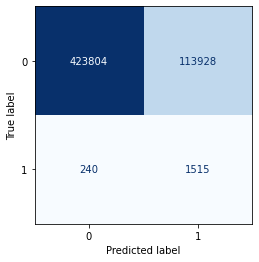

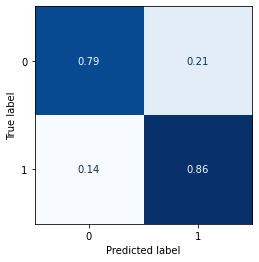

In [19]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complexSMOTEENN_prob = (model_complex_SMOTEENN_4l_512n.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complexSMOTEENN_prob = (model_complex_SMOTEENN_4l_512n.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complex_SMOTEENN_4l_512n.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_complex_SMOTEENN_4l_512n.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complexSMOTEENN_prob))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complexSMOTEENN_prob))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complexSMOTEENN_prob)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complexSMOTEENN_prob,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 512)               262656    
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_______________________________________________________________

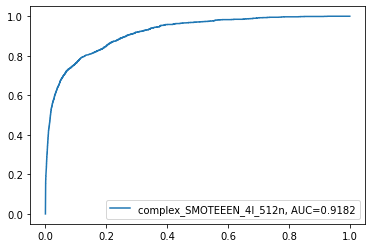

In [21]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complexSMOTEENN_prob = (model_complex_SMOTEENN_4l_512n.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complexSMOTEENN_prob = (model_complex_SMOTEENN_4l_512n.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complex_SMOTEENN_4l_512n.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complexSMOTEENN_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complexSMOTEENN_prob), 4)
plt.plot(fpr,tpr,label="complex_SMOTEEEN_4l_512n, AUC="+str(auc))





#add legend
plt.legend()

In [1]:
##### Step 5 - Specify the structure of a Neural Network
model_simple1_SMOTEENN = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(1, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpoint1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_simple1_SMOTEENN.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_simple1_SMOTEENN.fit(X_training, Y_traning, epochs = 25 , sample_weight=sample_weight, callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


NameError: name 'tf' is not defined

In [30]:
model_simple1_SMOTEENN.save('model_simple_SMOTEENN_1l_1n_25epochs_savedmode')
model_simple1_SMOTEENN.save('model_simple_SMOTEENN_1l_1n_25epochs_savedmode.h5')

INFO:tensorflow:Assets written to: model_simple_SMOTEENN_1l_1n_25epochs_savedmode/assets



-------------------- Model Summary --------------------
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 1)                 9         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_9
Layer:  Hidden-Layer1
Layer:  dropout_9
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
       

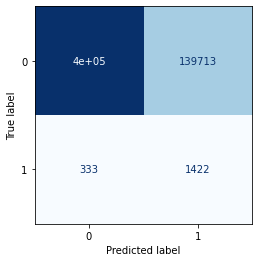

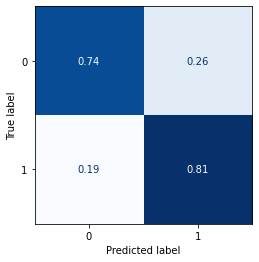

In [27]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple1_SMOTEENN = (model_simple1_SMOTEENN.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_simple1_SMOTEENN = (model_simple1_SMOTEENN.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple1_SMOTEENN.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_simple1_SMOTEENN.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_simple1_SMOTEENN))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_simple1_SMOTEENN))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple1_SMOTEENN)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple1_SMOTEENN,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 1)                 9         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________



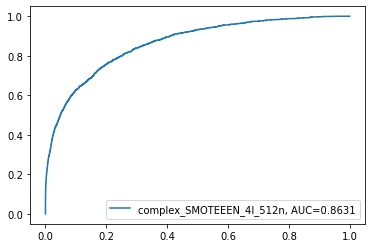

In [28]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple1_SMOTEENN_prob = (model_simple1_SMOTEENN.predict(x_training))
# Predict class labels on a test data
pred_labels_tr_simple1_SMOTEENN_prob = (model_simple1_SMOTEENN.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple1_SMOTEENN.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_tr_simple1_SMOTEENN_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_tr_simple1_SMOTEENN_prob), 4)
plt.plot(fpr,tpr,label="complex_SMOTEEEN_4l_512n, AUC="+str(auc))





#add legend
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


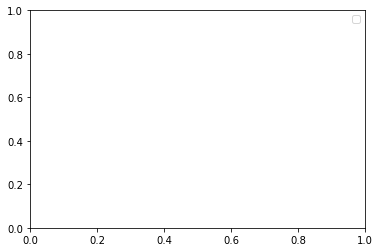

In [32]:
model_simple_SMOTEENN = tf.keras.models.load_model('model_simple_SMOTEENN_512n')

# Check its architecture
model_simple_SMOTEENN.summary()
#add legend
plt.legend()

##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTEENN_512n = (model_simple_SMOTEENN.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple_SMOTEENN_512n = (model_simple_SMOTEENN.predict(x_test))
#> 0.01).astype(int)


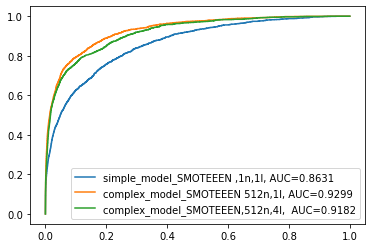

In [33]:
plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_tr_simple1_SMOTEENN_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_tr_simple1_SMOTEENN_prob), 4)
plt.plot(fpr,tpr,label="simple_model_SMOTEEEN ,1n,1l, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTEENN_512n)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTEENN_512n), 4)
plt.plot(fpr,tpr,label="complex_model_SMOTEEEN 512n,1l, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complexSMOTEENN_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complexSMOTEENN_prob), 4)
plt.plot(fpr,tpr,label="complex_model_SMOTEEEN,512n,4l,  AUC="+str(auc))



#add legend
plt.legend()

In [4]:
##### Step 5 - Specify the structure of a Neural Network
model_simple8_SMOTEENN = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpointmodel_simple8_SMOTEENN'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_simple8_SMOTEENN.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

h = model_simple8_SMOTEENN.fit(X_training_smtenn, Y_traning_smtenn, epochs = 25 ,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


2022-07-07 21:18:01.579032: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-07 21:18:01.580783: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 8388051 samples, validate on 688402 samples
Epoch 1/25
8388051/8388051 [==============================] - 992s 118us/sample - loss: 0.5190 - accuracy: 0.7376 - val_loss: 0.4753 - val_accuracy: 0.7283
Epoch 2/25
8388051/8388051 [==============================] - 370s 44us/sample - loss: 0.5123 - accuracy: 0.7415 - val_loss: 0.5134 - val_accuracy: 0.7582
Epoch 3/25
8388051/8388051 [==============================] - 1539s 183us/sample - loss: 0.5120 - accuracy: 0.7417 - val_loss: 0.5207 - val_accuracy: 0.7298
Epoch 4/25
8388051/8388051 [==============================] - 336s 40us/sample - loss: 0.5118 - accuracy: 0.7416 - val_loss: 0.5215 - val_accuracy: 0.7295
Epoch 5/25
8388051/8388051 [==============================] - 323s 39us/sample - loss: 0.5123 - accuracy: 0.7415 - val_loss: 0.5307 - val_accuracy: 0.7388
Epoch 6/25
8388051/8388051 [==============================] - 1045s 125us/sample - loss: 0.5125 - accuracy: 0.7418 - val_loss: 0.5269 - val_accuracy: 0.6675
Epoch 7/25
8

In [5]:
model_simple8_SMOTEENN.save('model_simple8_SMOTEENN')
model_simple8_SMOTEENN.save('model_simple8_SMOTEENN.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-07-08 01:34:37.570959: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_simple8_SMOTEENN/assets



-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten
Layer:  Hidden-Layer1
Layer:  dropout
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
             

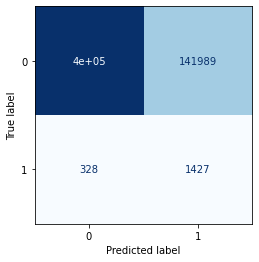

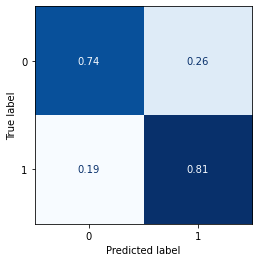

In [6]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple8_SMOTEENN = (model_simple8_SMOTEENN.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_simple8_SMOTEENN = (model_simple8_SMOTEENN.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple8_SMOTEENN.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_simple8_SMOTEENN.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_simple8_SMOTEENN))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_simple8_SMOTEENN))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple8_SMOTEENN)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple8_SMOTEENN,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________



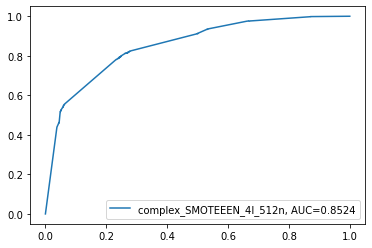

In [7]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple8_SMOTEENN_prob = (model_simple8_SMOTEENN.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple8_SMOTEENN_prob = (model_simple8_SMOTEENN.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple8_SMOTEENN.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple8_SMOTEENN_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple8_SMOTEENN_prob), 4)
plt.plot(fpr,tpr,label="simple8_SMOTEENN_8nodes_1layer, AUC="+str(auc))





#add legend
plt.legend()

In [8]:
##### Step 5 - Specify the structure of a Neural Network
model_complx_SMOTEENN_4l_256n = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpointmodel_simple8_SMOTEENN'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_complx_SMOTEENN_4l_256n.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_complx_SMOTEENN_4l_256n.fit(X_training_smtenn, Y_traning_smtenn, epochs = 10 ,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8388051 samples, validate on 688402 samples
Epoch 1/10
8388051/8388051 [==============================] - 2380s 284us/sample - loss: 0.3848 - accuracy: 0.8163 - val_loss: 0.3771 - val_accuracy: 0.8189
Epoch 2/10
8388051/8388051 [==============================] - 1937s 231us/sample - loss: 0.3757 - accuracy: 0.8211 - val_loss: 0.4743 - val_accuracy: 0.7684
Epoch 3/10
8388051/8388051 [==============================] - 1943s 232us/sample - loss: 0.3755 - accuracy: 0.8209 - val_loss: 0.4128 - val_accuracy: 0.7855
Epoch 4/10
8388051/8388051 [==============================] - 2274s 271us/sample - loss: 0.3760 - accuracy: 0.8211 - val_loss: 0.3722 - val_accuracy: 0.8121
Epoch 5/10
8388051/8388051 [==============================] - 2751s 328us/sample - loss: 0.3764 - accuracy: 0.8209 - val_loss: 0.3286 - val_accuracy: 0.8810
Epoch 6/10
8388051/8388051 [==============================] - 2091s 249us/sample - loss: 0.3768 - accuracy: 0.8206 - val_loss: 0.3392 - val_accuracy: 0.8636
Epoch

In [9]:
model_complx_SMOTEENN_4l_256n.save('model_complx_SMOTEENN_4l_256n')
model_complx_SMOTEENN_4l_256n.save('model_complx_SMOTEENN_4l_256n.h5')

INFO:tensorflow:Assets written to: model_complx_SMOTEENN_4l_256n/assets



-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_______________________________________________________________

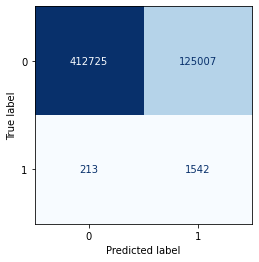

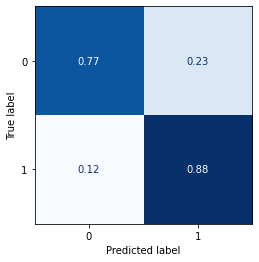

In [10]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_SMOTEENN_4l_256n = (model_complx_SMOTEENN_4l_256n.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complx_SMOTEENN_4l_256n = (model_complx_SMOTEENN_4l_256n.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complx_SMOTEENN_4l_256n.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_complx_SMOTEENN_4l_256n.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complx_SMOTEENN_4l_256n))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complx_SMOTEENN_4l_256n))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_SMOTEENN_4l_256n)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_SMOTEENN_4l_256n,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_______________________________________________________________

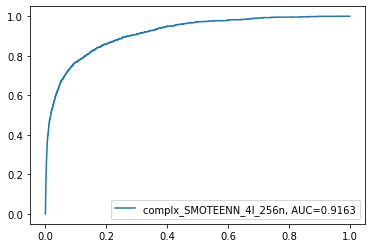

In [11]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_SMOTEENN_4l_256n_prob = (model_complx_SMOTEENN_4l_256n.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complx_SMOTEENN_4l_256n_prob = (model_complx_SMOTEENN_4l_256n.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complx_SMOTEENN_4l_256n.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTEENN_4l_256n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTEENN_4l_256n_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTEENN_4l_256n, AUC="+str(auc))





#add legend
plt.legend()

In [12]:
complex_SMOTEENN_512n_1l = tf.keras.models.load_model('model_simple_SMOTEENN_512n')

# Check its architecture
complex_SMOTEENN_512n_1l.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________



-------------------- Model Summary --------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_3
Layer:  Hidden-Layer1
Layer:  dropout_3
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
 

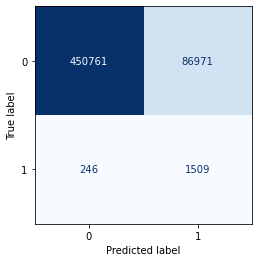

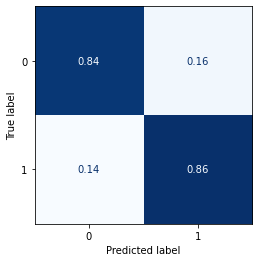

In [13]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_SMOTEENN_1l_512n = (complex_SMOTEENN_512n_1l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complx_SMOTEENN_1l_512n = (complex_SMOTEENN_512n_1l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
complex_SMOTEENN_512n_1l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in complex_SMOTEENN_512n_1l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complx_SMOTEENN_1l_512n))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complx_SMOTEENN_1l_512n))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_SMOTEENN_1l_512n)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_SMOTEENN_1l_512n,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________



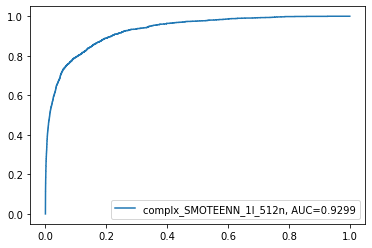

In [14]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_SMOTEENN_1l_512n_prob = (complex_SMOTEENN_512n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complx_SMOTEENN_1l_512n_prob = (complex_SMOTEENN_512n_1l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
complex_SMOTEENN_512n_1l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTEENN_1l_512n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTEENN_1l_512n_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTEENN_1l_512n, AUC="+str(auc))





#add legend
plt.legend()

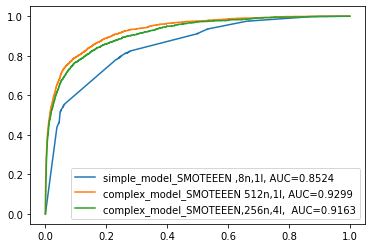

In [15]:
plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple8_SMOTEENN_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple8_SMOTEENN_prob), 4)
plt.plot(fpr,tpr,label="simple_model_SMOTEEEN ,8n,1l, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTEENN_1l_512n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTEENN_1l_512n_prob), 4)
plt.plot(fpr,tpr,label="complex_model_SMOTEEEN 512n,1l, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTEENN_4l_256n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTEENN_4l_256n_prob), 4)
plt.plot(fpr,tpr,label="complex_model_SMOTEEEN,256n,4l,  AUC="+str(auc))



#add legend
plt.legend()